In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

carac = pd.read_csv('projet_ datascientest/caracteristiques.csv', low_memory=False)
lieux = pd.read_csv('projet_ datascientest/lieux.csv', low_memory=False)
usagers = pd.read_csv('projet_ datascientest/usagers.csv', low_memory=False)
vehicules = pd.read_csv('projet_ datascientest/vehicules.csv', low_memory=False)

In [19]:
carac.head(20)

,Unnamed: 0,num_acc,mois,jour,hrmn,lum,agg,int,atm,col,com,adr,gps,lat,long,dep,annee
0,1,200500000001,1,12,1900,3,2,1,1.0,3.0,11,CD41B,M,5051500,294400,590,2005
1,2,200500000002,1,21,1600,1,2,1,1.0,1.0,51,rue de Lille,M,5053700,280200,590,2005
2,3,200500000003,1,21,1845,3,1,1,2.0,1.0,51,NaN,M,5054600,280000,590,2005
3,4,200500000004,1,4,1615,1,1,1,1.0,5.0,82,NaN,M,5098700,240800,590,2005
4,5,200500000005,1,10,1945,3,1,1,3.0,6.0,478,NaN,M,5096400,247500,590,2005
5,6,200500000006,1,28,1415,1,1,1,8.0,6.0,82,NaN,M,5099500,239700,590,2005
6,7,200500000007,1,3,1530,1,1,1,1.0,3.0,130,NaN,M,0,0,590,2005
7,8,200500000008,1,18,2115,5,2,1,2.0,6.0,404,le hameau du lac,M,5105200,253300,590,2005
8,9,200500000009,1,25,1715,1,1,2,8.0,3.0,309,NaN,M,5097300,257100,590,2005
9,10,200500000010,1,29,2015,3,1,1,2.0,6.0,260,NaN,M,5106500,252400,590,2005


In [32]:
carac.shape

(1121571, 17)

In [33]:
carac.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1121571 entries, 0 to 1121570
Data columns (total 17 columns):
 #   Column      Non-Null Count    Dtype  
---  ------      --------------    -----  
 0   Unnamed: 0  1121571 non-null  int64  
 1   num_acc     1121571 non-null  int64  
 2   mois        1121571 non-null  int64  
 3   jour        1121571 non-null  int64  
 4   hrmn        1121571 non-null  object 
 5   lum         1121571 non-null  int64  
 6   agg         1121571 non-null  int64  
 7   int         1121571 non-null  int64  
 8   atm         1121498 non-null  float64
 9   col         1121552 non-null  float64
 10  com         1121569 non-null  object 
 11  adr         978295 non-null   object 
 12  gps         643154 non-null   object 
 13  lat         634503 non-null   object 
 14  long        634499 non-null   object 
 15  dep         1121571 non-null  object 
 16  annee       1121571 non-null  int64  
dtypes: float64(2), int64(8), object(7)
memory usage: 145.5+ MB


In [27]:
carac['col'].value_counts()

 6.0    365928
 3.0    324774
 2.0    132759
 7.0    115221
 1.0    109683
 4.0     35941
 5.0     35709
-1.0      1537
Name: col, dtype: int64

In [22]:
carac['mois'].value_counts()

10    106702
6     105582
9     104248
7     101169
5      95761
11     95399
12     92134
4      87040
1      86332
3      86313
8      84833
2      76058
Name: mois, dtype: int64

In [35]:
carac['jour'].value_counts()  

6     38286
12    38063
7     38041
10    38022
9     37783
16    37697
8     37593
15    37417
5     37243
19    37241
4     37239
18    37198
14    37196
13    37184
21    37149
11    37147
17    36928
3     36848
20    36841
22    36687
23    36595
2     36388
28    36051
24    35833
27    35533
1     35235
25    35118
26    35092
30    33913
29    33864
31    20146
Name: jour, dtype: int64

In [14]:
carac['col'].corr(carac['atm'])

0.023616290220557928

In [8]:
carac.corr()

,Unnamed: 0,num_acc,mois,jour,lum,agg,int,atm,col,annee
Unnamed: 0,1.000000,0.995607,0.026650,0.002175,0.000307,-0.033634,0.079058,0.009205,-0.011689,0.995605
num_acc,0.995607,1.000000,0.006986,0.002873,-0.003401,-0.041649,0.079247,0.010896,-0.014385,1.000000
mois,0.026650,0.006986,1.000000,-0.017122,0.057560,-0.008961,0.001299,0.012980,-0.005524,0.006973
jour,0.002175,0.002873,-0.017122,1.000000,-0.005486,-0.003308,-0.001665,-0.006287,-0.002461,0.002873
lum,0.000307,-0.003401,0.057560,-0.005486,1.000000,0.086452,0.020221,0.027874,0.064903,-0.003403
agg,-0.033634,-0.041649,-0.008961,-0.003308,0.086452,1.000000,0.161032,-0.060203,0.013123,-0.041653
int,0.079058,0.079247,0.001299,-0.001665,0.020221,0.161032,1.000000,0.002357,-0.062131,0.079246
atm,0.009205,0.010896,0.012980,-0.006287,0.027874,-0.060203,0.002357,1.000000,0.023616,0.010897
col,-0.011689,-0.014385,-0.005524,-0.002461,0.064903,0.013123,-0.062131,0.023616,1.000000,-0.014385
annee,0.995605,1.000000,0.006973,0.002873,-0.003403,-0.041653,0.079246,0.010897,-0.014385,1.000000


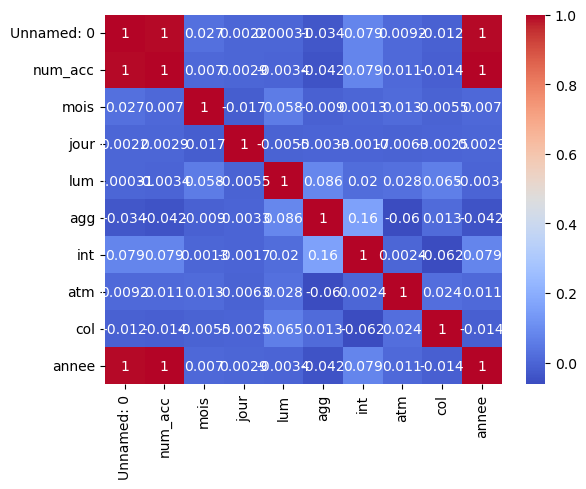

In [3]:
correlation_matrix = carac.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.show();

In [11]:
carac.duplicated()

0          False
1          False
2          False
3          False
4          False
           ...  
1121566    False
1121567    False
1121568    False
1121569    False
1121570    False
Length: 1121571, dtype: bool

In [12]:
carac.duplicated().sum()

0

In [13]:
carac.isna().sum()

Unnamed: 0         0
num_acc            0
mois               0
jour               0
hrmn               0
lum                0
agg                0
int                0
atm               73
col               19
com                2
adr           143276
gps           478417
lat           487068
long          487072
dep                0
annee              0
date               0
dtype: int64

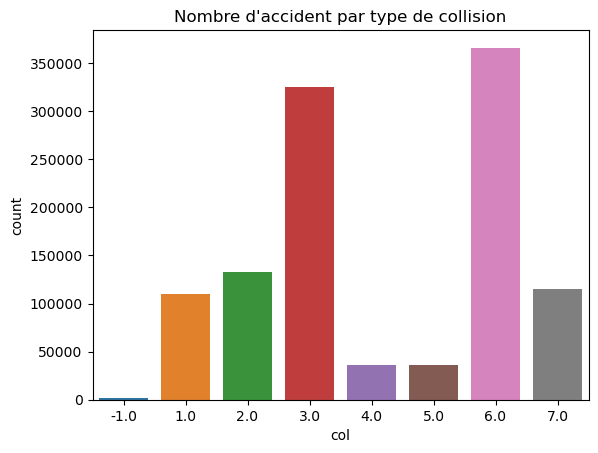

In [3]:
# Le nombre d'accidents par type de collision

sns.countplot(x=carac['col'])
plt.title("Nombre d'accident par type de collision");

# Type de collision : 
# -1 – Non renseigné 
# 1 – Deux véhicules - frontale 
# 2 – Deux véhicules – par l’arrière 
# 3 – Deux véhicules – par le coté 
# 4 – Trois véhicules et plus – en chaîne 
# 5 – Trois véhicules et plus - collisions multiples 
# 6 – Autre collision 
# 7 – Sans collision

# lA LECTURE DU GRAPHIQUE fait apparaitre un nombre d'accidents élevé impliquant deux véhicules - par le côté.
# La donnée ''Autre collision'', qui représente le nombre le plus élevé, n'est toutefois pas interprétable/exploitable
# dans l'état et nécessitera une analyse ultérieure approfondie  

In [2]:
# Distribution de la variable "col"
distribution = carac['col'].describe()
print(distribution)

count    1.121552e+06
mean     4.166022e+00
std      1.977736e+00
min     -1.000000e+00
25%      3.000000e+00
50%      3.000000e+00
75%      6.000000e+00
max      7.000000e+00
Name: col, dtype: float64


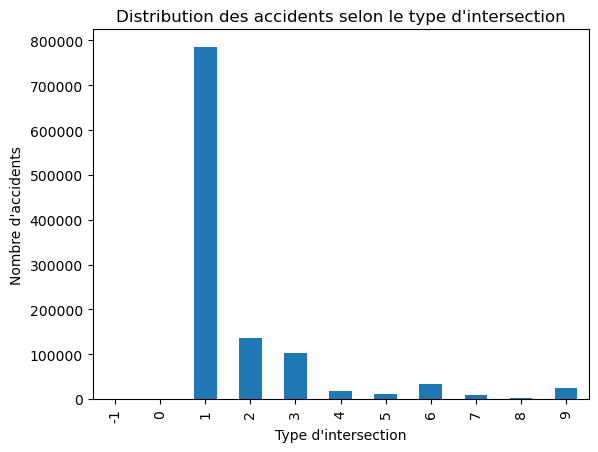

In [2]:
# Le nombre d'accidents selon le type d'intersection
counts = carac['int'].value_counts()

# Tri par type d'intersection
counts = counts.sort_index()

# Distribution des accidents selon le type d'intersection sous forme de graphe
counts.plot(kind='bar')

plt.title("Distribution des accidents selon le type d'intersection")
plt.xlabel("Type d'intersection")
plt.ylabel("Nombre d'accidents")

plt.show()

# Type d'intersection : 
1 – Hors intersection 
2 – Intersection en X 
3 – Intersection en T 
4 – Intersection en Y 
5 – Intersection à plus de 4 branches 
6 – Giratoire 
7 – Place 
8 – Passage à niveau 
9 – Autre intersection 

# lA LECTURE DU GRAPHIQUE fait apparaitre sur sur-représentation d'accident/collisions dans un contexte hors intersection

In [3]:
# Distribution de la variable "int"
distribution = carac['int'].describe()
print(distribution)

count    1.121571e+06
mean     1.769267e+00
std      1.632726e+00
min     -1.000000e+00
25%      1.000000e+00
50%      1.000000e+00
75%      2.000000e+00
max      9.000000e+00
Name: int, dtype: float64


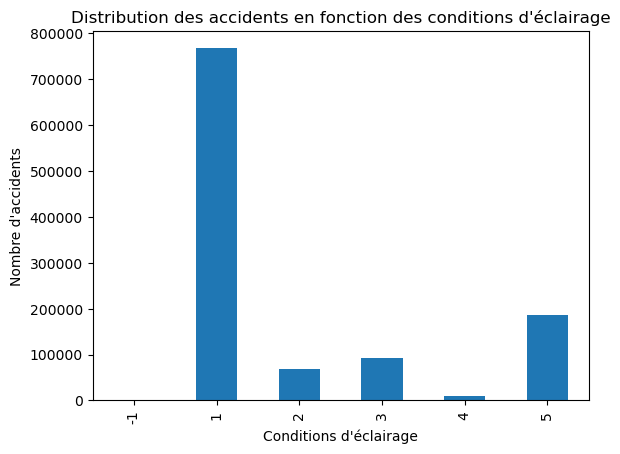

In [4]:
# Le nombre d'accidents en fonction des conditions d'éclairage
counts = carac['lum'].value_counts()

# Tri selon les conditions d'éclairage
counts = counts.sort_index()

# Distribution des accidents en fonction des conditions d'éclairage sous forme de graphe
counts.plot(kind='bar')

plt.title("Distribution des accidents en fonction des conditions d'éclairage")
plt.xlabel("Conditions d'éclairage")
plt.ylabel("Nombre d'accidents")

plt.show()

# Conditions d’éclairage dans lesquelles l'accident s'est produit : 
1 – Plein jour 
2 – Crépuscule ou aube 
3 – Nuit sans éclairage public 
4 – Nuit avec éclairage public non allumé 
5 – Nuit avec éclairage public allumé

# lA LECTURE DU GRAPHIQUE montre que les collisions se produisent en forte majorité très tôt le matin avant le lever du jour.

In [4]:
# Distribution de la variable "lum"
distribution = carac['lum'].describe()
print(distribution)

count    1.121571e+06
mean     1.911852e+00
std      1.509596e+00
min     -1.000000e+00
25%      1.000000e+00
50%      1.000000e+00
75%      3.000000e+00
max      5.000000e+00
Name: lum, dtype: float64


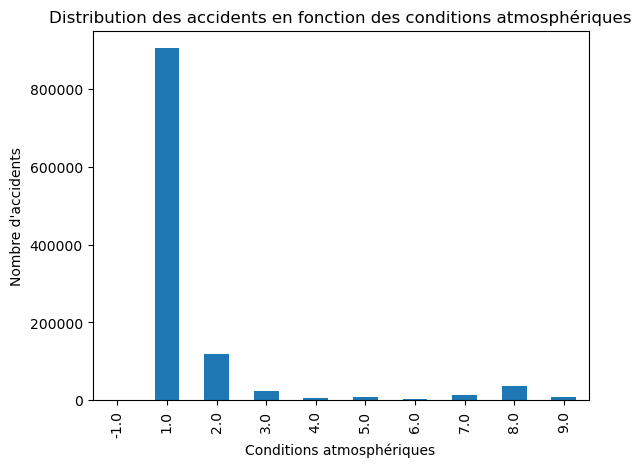

In [7]:
# Le nombre d'accidents en fonction des conditions atmosphériques
counts = carac['atm'].value_counts()

# Tri selon les conditions atmosphériques 
counts = counts.sort_index()

# Distribution des accidents en fonction des conditions atmosphériques sous forme de graphe
counts.plot(kind='bar')

plt.title("Distribution des accidents en fonction des conditions atmosphériques")
plt.xlabel("Conditions atmosphériques")
plt.ylabel("Nombre d'accidents")

plt.show()

# Conditions atmosphériques : 
-1 – Non renseigné 
1 – Normale 
2 – Pluie légère 
3 – Pluie forte 
4 – Neige - grêle 
5 – Brouillard - fumée 
6 – Vent fort - tempête 
7 – Temps éblouissant 
8 – Temps couvert 
9 – Autre

# lA LECTURE DU GRAPHIQUE est inatendue puisque l'on peut observer que la majorité des collisions se produise
# dans des conditions climatiques normales, sans intempréries ou tout autre perturbation atmosphérique.
# On constate toutefois qu'une pluie légère est la deuxième cause de collision.

In [5]:
# Distribution de la variable "atm"
distribution = carac['atm'].describe()
print(distribution)

count    1.121498e+06
mean     1.562441e+00
std      1.608666e+00
min     -1.000000e+00
25%      1.000000e+00
50%      1.000000e+00
75%      1.000000e+00
max      9.000000e+00
Name: atm, dtype: float64


C:\Users\clevr\anaconda3\lib\site-packages\pandas\core\tools\datetimes.py:1047: UserWarning: Parsing '21-10-2005' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  cache_array = _maybe_cache(arg, format, cache, convert_listlike)
C:\Users\clevr\anaconda3\lib\site-packages\pandas\core\tools\datetimes.py:1047: UserWarning: Parsing '29-10-2005' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  cache_array = _maybe_cache(arg, format, cache, convert_listlike)
C:\Users\clevr\anaconda3\lib\site-packages\pandas\core\tools\datetimes.py:1047: UserWarning: Parsing '18-10-2005' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  cache_array = _maybe_cache(arg, format, cache, convert_listlike)
C:\Users\clevr\anaconda3\lib\site-packages\pandas\core\tools\datetimes.py:1047: UserWarning: Parsing '16-10-2005' in DD/MM/YYYY format. Provide format or specif

C:\Users\clevr\anaconda3\lib\site-packages\pandas\core\tools\datetimes.py:1047: UserWarning: Parsing '28-10-2012' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  cache_array = _maybe_cache(arg, format, cache, convert_listlike)
C:\Users\clevr\anaconda3\lib\site-packages\pandas\core\tools\datetimes.py:1047: UserWarning: Parsing '24-11-2012' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  cache_array = _maybe_cache(arg, format, cache, convert_listlike)
C:\Users\clevr\anaconda3\lib\site-packages\pandas\core\tools\datetimes.py:1047: UserWarning: Parsing '17-12-2012' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  cache_array = _maybe_cache(arg, format, cache, convert_listlike)
C:\Users\clevr\anaconda3\lib\site-packages\pandas\core\tools\datetimes.py:1047: UserWarning: Parsing '25-10-2012' in DD/MM/YYYY format. Provide format or specif

C:\Users\clevr\anaconda3\lib\site-packages\pandas\core\tools\datetimes.py:1047: UserWarning: Parsing '30-11-2021' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  cache_array = _maybe_cache(arg, format, cache, convert_listlike)
C:\Users\clevr\anaconda3\lib\site-packages\pandas\core\tools\datetimes.py:1047: UserWarning: Parsing '23-11-2021' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  cache_array = _maybe_cache(arg, format, cache, convert_listlike)
C:\Users\clevr\anaconda3\lib\site-packages\pandas\core\tools\datetimes.py:1047: UserWarning: Parsing '13-12-2021' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  cache_array = _maybe_cache(arg, format, cache, convert_listlike)
C:\Users\clevr\anaconda3\lib\site-packages\pandas\core\tools\datetimes.py:1047: UserWarning: Parsing '21-11-2021' in DD/MM/YYYY format. Provide format or specif

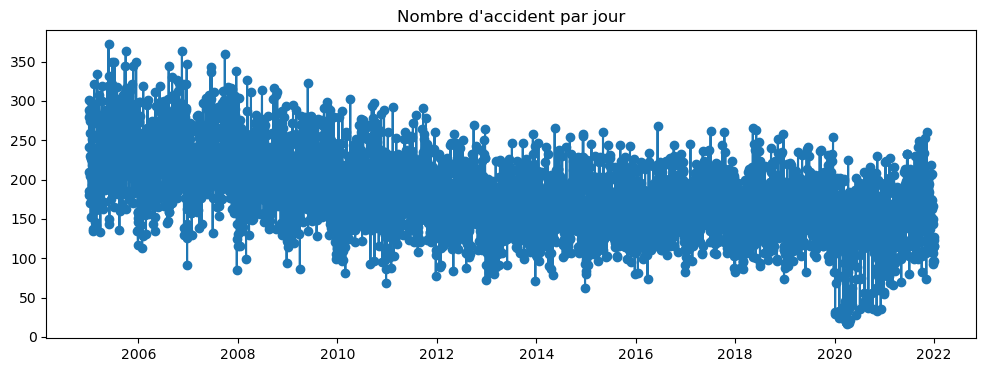

In [18]:
# Afficher le nombre d'accident par jour

carac['date'] = carac['jour'].astype(str) + '-' + carac['mois'].astype(str) + '-' + carac['annee'].astype(str) 
carac['date'] = pd.to_datetime(carac['date'])

values = carac['date'].value_counts().sort_index()

plt.figure(figsize=(12, 4))
plt.plot_date(values.index, values, linestyle='-')
plt.title("Nombre d'accident par jour");

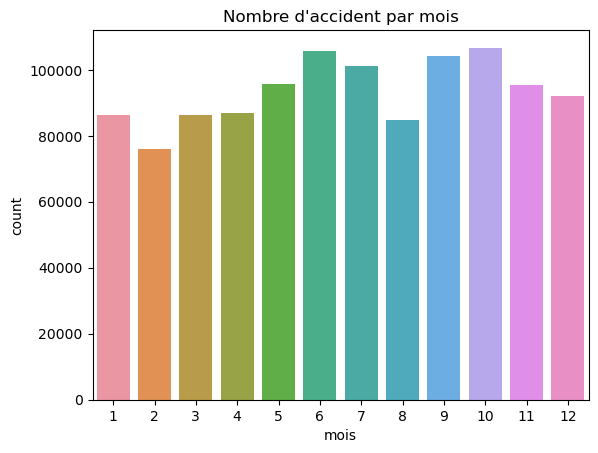

In [19]:
# Avec ce graphe, je n'ai pas réussi à mettre en évidence des pics d'accidents pour certains jours.
# Il serait sans doute pertinent de montrer une tendance globale, que certains mois sont plus propices aux accidents
# que d'autres. Essayons de montrer ce constat en affichant le nombre d'accidents par mois.

# le nombre d'accidents par mois
sns.countplot(x=carac['mois'])
# carac.groupby('mois').agg({'Num_Acc': 'count'}).plot.bar()

plt.title("Nombre d'accident par mois");

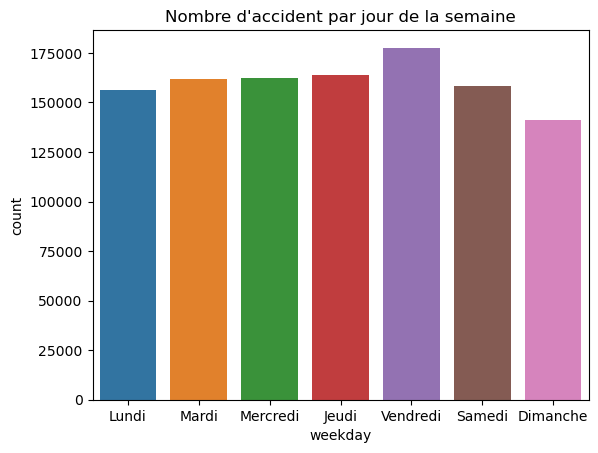

In [20]:
# Mais alors, qu'en est-il des jours de la semaine ?

# Nombre d'accident par jour de la semaine.
# La méthode dt.weekday permet de déterminer le jour de la semaine à partir d'une date au format datetime 

carac['weekday'] = carac['date'].dt.weekday

sns.countplot(x=carac['weekday'])
# carac.groupby('weekday').agg({'Num_Acc': 'count'}).plot.bar()

plt.xticks(np.arange(7), ['Lundi', 'Mardi', 'Mercredi', 'Jeudi', 'Vendredi', 'Samedi', 'Dimanche'])
plt.title("Nombre d'accident par jour de la semaine");

In [ ]:
# On constate qu'il y a un peu moins d'accidents le week-end qu'en semaine.
# Sachant que la variable hrmn contient l'heure et les minutes de chaque accident, on peut encore affiner notre analyse
# avec le nombre d'accident réparti selon l'heure de la journée.

In [ ]:
# Nombre d'accidents selon l'heure de la journée

carac['heure'] = carac['hrmn']//100
# carac['minutes'] = carac['hrmn']%100

sns.countplot(x=carac['heure'])
# carac.groupby('heure').agg({'Num_Acc': 'count'}).plot.bar()

plt.xticks([0, 6, 12, 18, 24], ['Minuit', '6h', 'Midi', '18h', 'Minuit'])
plt.title("Nombre d'accident par heure de la journée");

## ERREUR DE CODE A PRIORI - PAS D'AFFICHAGE!

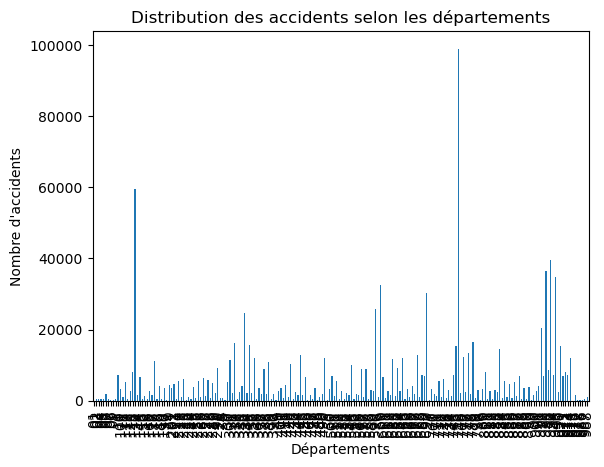

In [8]:
# Répartition du nombre d'accidents selon les départements
counts = carac['dep'].value_counts()

# Tri selon les départements 
counts = counts.sort_index()

# Distribution des accidents selon les départements sous forme de graphe
counts.plot(kind='bar')

plt.title("Distribution des accidents selon les départements")
plt.xlabel("Départements")
plt.ylabel("Nombre d'accidents")

plt.show()

# Département : Code INSEE (Institut National de la Statistique et des Etudes Economiques) du département 
# (2A Corse-du-Sud – 2B Haute-Corse)

In [7]:
# Distribution de la variable "dep"
distribution = carac['dep'].value_counts()
print(distribution)

# Département : Code INSEE (Institut National de la Statistique et des Etudes Economiques) du département 
# (2A Corse-du-Sud – 2B Haute-Corse)

750    99021
130    59442
930    39476
920    36409
940    34658
       ...  
978      104
8         91
977       51
986       32
975       12
Name: dep, Length: 204, dtype: int64


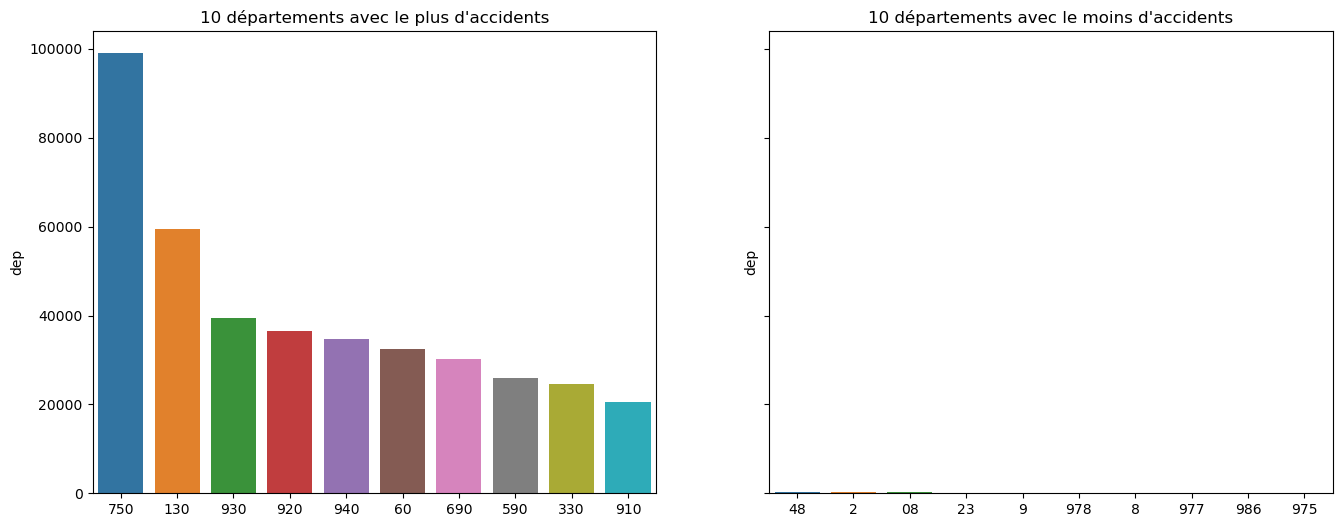

In [23]:
# Lieu des accidents
# Affichage côtes à côtes des 10 départements avec le plus d'accidents, et les 10 départements avec le moins d'accidents.

max_col = carac['dep'].value_counts().head(10)
min_col = carac['dep'].value_counts().tail(10)

fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(16,6), sharey=True)

sns.barplot(x=max_col.index, y=max_col, order=max_col.index, ax=ax1)
# max_col.plot.bar(ax=ax1)
ax1.title.set_text("10 départements avec le plus d'accidents")

sns.barplot(x=min_col.index, y=min_col, order=min_col.index, ax=ax2)
# min_col.plot.bar(ax=ax2)
ax2.title.set_text("10 départements avec le moins d'accidents");

# On souhaite pouvoir montrer (A PRIORI) que la majorité des départements avec le plus d'accidents font partie
# des départements les plus peuplés de France. La réciproque est aussi vraie pour les départements les moins peuplés.

In [ ]:
# En tête des départements, nous trouvons sans réelle surprise : Paris(75), Marseille (13) et la Seine Saint Denis (93)
# Les 3 départements où il y a le moins de collisions : 975 (Saint-Pierre-et-Miquelon), 986 (Wallis-et-Futuna)
# et 977 (Saint-Barthélemy)

In [24]:
lieux.head(20)

,Unnamed: 0,num_acc,catr,voie,v1,v2,circ,nbv,pr,pr1,...,prof,plan,lartpc,larrout,surf,infra,situ,env1,annee,vma
0,1,200500000001,3.0,41,0.0,B,2.0,2.0,1,430,...,1.0,1.0,0.0,63.0,1.0,0.0,1.0,0.0,2005,NaN
1,2,200500000002,2.0,41,0.0,NaN,0.0,2.0,0,0,...,1.0,1.0,0.0,100.0,1.0,0.0,5.0,0.0,2005,NaN
2,3,200500000003,2.0,41,0.0,NaN,0.0,0.0,0,0,...,1.0,1.0,0.0,0.0,2.0,0.0,5.0,0.0,2005,NaN
3,4,200500000004,3.0,916,0.0,NaN,2.0,2.0,0,0,...,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,2005,NaN
4,5,200500000005,3.0,110,0.0,NaN,2.0,2.0,24,630,...,1.0,3.0,0.0,59.0,2.0,0.0,3.0,0.0,2005,NaN
5,6,200500000006,3.0,916,0.0,NaN,2.0,2.0,47,0,...,1.0,3.0,0.0,70.0,2.0,0.0,5.0,0.0,2005,NaN
6,7,200500000007,3.0,600,0.0,NaN,2.0,0.0,6,638,...,1.0,1.0,0.0,78.0,1.0,0.0,1.0,0.0,2005,NaN
7,8,200500000008,3.0,947,0.0,NaN,2.0,2.0,53,900,...,1.0,3.0,0.0,69.0,1.0,0.0,3.0,0.0,2005,NaN
8,9,200500000009,3.0,55,0.0,NaN,2.0,2.0,3,200,...,0.0,1.0,0.0,67.0,1.0,0.0,1.0,0.0,2005,NaN
9,10,200500000010,2.0,1,0.0,NaN,0.0,2.0,32,13,...,1.0,1.0,0.0,70.0,2.0,0.0,1.0,0.0,2005,NaN


In [15]:
lieux.shape

(1017309, 21)

In [16]:
lieux.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1017309 entries, 0 to 1017308
Data columns (total 21 columns):
 #   Column      Non-Null Count    Dtype  
---  ------      --------------    -----  
 0   Unnamed: 0  1017309 non-null  int64  
 1   num_acc     1017309 non-null  int64  
 2   catr        1017308 non-null  float64
 3   voie        925463 non-null   object 
 4   v1          381485 non-null   float64
 5   v2          43515 non-null    object 
 6   circ        1015735 non-null  float64
 7   nbv         1014578 non-null  float64
 8   pr          541825 non-null   object 
 9   pr1         540006 non-null   object 
 10  vosp        1014548 non-null  float64
 11  prof        1015360 non-null  float64
 12  plan        1015028 non-null  float64
 13  lartpc      902482 non-null   float64
 14  larrout     904468 non-null   float64
 15  surf        1015385 non-null  float64
 16  infra       1011901 non-null  float64
 17  situ        1012339 non-null  float64
 18  env1        953029 non

In [17]:
lieux.describe()

,Unnamed: 0,num_acc,catr,v1,circ,nbv,vosp,prof,plan,lartpc,larrout,surf,infra,situ,env1,annee,vma
count,1.017309e+06,1.017309e+06,1.017308e+06,381485.000000,1.015735e+06,1.014578e+06,1.014548e+06,1.015360e+06,1.015028e+06,902482.000000,904468.000000,1.015385e+06,1.011901e+06,1.012339e+06,953029.000000,1.017309e+06,58840.000000
mean,5.086550e+05,2.011402e+11,3.401877e+00,0.064058,1.856510e+00,2.086871e+00,1.322559e-01,1.151148e+00,1.205765e+00,5.307439,57.925162,1.259488e+00,4.647797e-01,1.205352e+00,38.230840,2.011402e+03,59.921669
std,2.936720e+05,4.376329e+08,1.205831e+00,0.538597,7.321721e-01,1.520311e+00,5.591368e-01,6.121421e-01,7.218419e-01,23.055074,64.608495,9.448931e-01,1.422236e+00,8.064453e-01,48.059472,4.376378e+00,23.960359
min,1.000000e+00,2.005000e+11,1.000000e+00,0.000000,-1.000000e+00,-1.000000e+00,-1.000000e+00,-1.000000e+00,-1.000000e+00,0.000000,-81.000000,-1.000000e+00,-1.000000e+00,-1.000000e+00,0.000000,2.005000e+03,-1.000000
25%,2.543280e+05,2.008000e+11,3.000000e+00,0.000000,2.000000e+00,2.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,0.000000,0.000000,1.000000e+00,0.000000e+00,1.000000e+00,0.000000,2.008000e+03,50.000000
50%,5.086550e+05,2.011000e+11,4.000000e+00,0.000000,2.000000e+00,2.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,0.000000,60.000000,1.000000e+00,0.000000e+00,1.000000e+00,0.000000,2.011000e+03,50.000000
75%,7.629820e+05,2.015000e+11,4.000000e+00,0.000000,2.000000e+00,2.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,0.000000,80.000000,1.000000e+00,0.000000e+00,1.000000e+00,99.000000,2.015000e+03,80.000000
max,1.017309e+06,2.019001e+11,9.000000e+00,9.000000,4.000000e+00,9.900000e+01,3.000000e+00,4.000000e+00,4.000000e+00,960.000000,999.000000,9.000000e+00,9.000000e+00,8.000000e+00,99.000000,2.019000e+03,800.000000


In [18]:
lieux.duplicated()

0          False
1          False
2          False
3          False
4          False
           ...  
1017304    False
1017305    False
1017306    False
1017307    False
1017308    False
Length: 1017309, dtype: bool

In [19]:
lieux.duplicated().sum()

0

In [20]:
lieux.isna().sum()

Unnamed: 0         0
num_acc            0
catr               1
voie           91846
v1            635824
v2            973794
circ            1574
nbv             2731
pr            475484
pr1           477303
vosp            2761
prof            1949
plan            2281
lartpc        114827
larrout       112841
surf            1924
infra           5408
situ            4970
env1           64280
annee              0
vma           958469
dtype: int64

In [38]:
usagers.head(20)

,Unnamed: 0,num_acc,place,catu,grav,sexe,trajet,secu,locp,actp,etatp,an_nais,num_veh,annee,id_vehicule,secu1,secu2,secu3
0,1,2.005000e+11,1.0,1,4,1,1.0,11.0,0.0,0,0.0,1976.0,A01,2005,NaN,NaN,NaN,NaN
1,2,2.005000e+11,1.0,1,3,2,3.0,11.0,0.0,0,0.0,1968.0,B02,2005,NaN,NaN,NaN,NaN
2,3,2.005000e+11,2.0,2,1,1,0.0,11.0,0.0,0,0.0,1964.0,B02,2005,NaN,NaN,NaN,NaN
3,4,2.005000e+11,4.0,2,1,1,0.0,31.0,0.0,0,0.0,2004.0,B02,2005,NaN,NaN,NaN,NaN
4,5,2.005000e+11,5.0,2,1,1,0.0,11.0,0.0,0,0.0,1998.0,B02,2005,NaN,NaN,NaN,NaN
5,6,2.005000e+11,3.0,2,1,2,0.0,11.0,0.0,0,0.0,1991.0,B02,2005,NaN,NaN,NaN,NaN
6,7,2.005000e+11,1.0,1,1,1,5.0,11.0,0.0,0,0.0,1955.0,A01,2005,NaN,NaN,NaN,NaN
7,8,2.005000e+11,1.0,1,3,1,5.0,21.0,0.0,0,0.0,1979.0,B02,2005,NaN,NaN,NaN,NaN
8,9,2.005000e+11,1.0,1,1,1,1.0,21.0,0.0,0,0.0,1983.0,A01,2005,NaN,NaN,NaN,NaN
9,10,2.005000e+11,1.0,1,3,1,1.0,21.0,0.0,0,0.0,1956.0,B02,2005,NaN,NaN,NaN,NaN


In [21]:
usagers.shape

(2509620, 18)

In [22]:
usagers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2509620 entries, 0 to 2509619
Data columns (total 18 columns):
 #   Column       Dtype  
---  ------       -----  
 0   Unnamed: 0   int64  
 1   num_acc      float64
 2   place        float64
 3   catu         int64  
 4   grav         int64  
 5   sexe         int64  
 6   trajet       float64
 7   secu         float64
 8   locp         float64
 9   actp         object 
 10  etatp        float64
 11  an_nais      float64
 12  num_veh      object 
 13  annee        int64  
 14  id_vehicule  object 
 15  secu1        float64
 16  secu2        float64
 17  secu3        float64
dtypes: float64(10), int64(5), object(3)
memory usage: 344.6+ MB


In [23]:
usagers.describe()

,Unnamed: 0,num_acc,place,catu,grav,sexe,trajet,secu,locp,etatp,an_nais,annee,secu1,secu2,secu3
count,2.509620e+06,2.509620e+06,2.386492e+06,2.509620e+06,2.509620e+06,2.509620e+06,2.509126e+06,2.085658e+06,2.453259e+06,2.453202e+06,2.504135e+06,2.509620e+06,367425.000000,367425.000000,367425.000000
mean,1.254810e+06,2.012251e+11,1.426311e+00,1.341396e+00,2.516410e+00,1.323586e+00,3.139610e+00,1.796288e+01,1.660656e-01,-3.379339e-02,1.974626e+03,2.012250e+03,1.979582,1.216251,-0.915591
std,7.244650e+05,4.959433e+08,1.384951e+00,6.311903e-01,1.340452e+00,4.756037e-01,2.686715e+00,1.929059e+01,9.543100e-01,5.428035e-01,1.880168e+01,4.959536e+00,2.339288,3.178031,0.887917
min,1.000000e+00,2.005000e+11,-1.000000e+00,1.000000e+00,-1.000000e+00,-1.000000e+00,-1.000000e+00,0.000000e+00,-1.000000e+00,-1.000000e+00,1.896000e+03,2.005000e+03,-1.000000,-1.000000,-1.000000
25%,6.274058e+05,2.008000e+11,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00,1.100000e+01,0.000000e+00,0.000000e+00,1.962000e+03,2.008000e+03,1.000000,-1.000000,-1.000000
50%,1.254810e+06,2.012000e+11,1.000000e+00,1.000000e+00,3.000000e+00,1.000000e+00,4.000000e+00,1.100000e+01,0.000000e+00,0.000000e+00,1.978000e+03,2.012000e+03,1.000000,0.000000,-1.000000
75%,1.882215e+06,2.017000e+11,1.000000e+00,2.000000e+00,4.000000e+00,2.000000e+00,5.000000e+00,2.100000e+01,0.000000e+00,0.000000e+00,1.989000e+03,2.017000e+03,2.000000,0.000000,-1.000000
max,2.509620e+06,2.021001e+11,1.000000e+01,4.000000e+00,4.000000e+00,2.000000e+00,9.000000e+00,9.300000e+01,9.000000e+00,3.000000e+00,2.021000e+03,2.021000e+03,9.000000,9.000000,9.000000


In [24]:
usagers.duplicated()

0          False
1          False
2          False
3          False
4          False
           ...  
2509615    False
2509616    False
2509617    False
2509618    False
2509619    False
Length: 2509620, dtype: bool

In [25]:
usagers.duplicated().sum()

0

In [26]:
usagers.isna().sum()

Unnamed: 0           0
num_acc              0
place           123128
catu                 0
grav                 0
sexe                 0
trajet             494
secu            423962
locp             56361
actp             56462
etatp            56418
an_nais           5485
num_veh              0
annee                0
id_vehicule    2142195
secu1          2142195
secu2          2142195
secu3          2142195
dtype: int64

In [39]:
vehicules.head(20)

,Unnamed: 0,num_acc,senc,catv,occutc,obs,obsm,choc,manv,num_veh,annee,id_vehicule,motor
0,1,200500000001,0.0,7,0.0,0.0,2.0,1.0,1.0,A01,2005,NaN,NaN
1,2,200500000001,0.0,7,0.0,0.0,2.0,8.0,10.0,B02,2005,NaN,NaN
2,3,200500000002,0.0,7,0.0,0.0,2.0,7.0,16.0,A01,2005,NaN,NaN
3,4,200500000002,0.0,2,0.0,0.0,2.0,1.0,1.0,B02,2005,NaN,NaN
4,5,200500000003,0.0,2,0.0,0.0,2.0,1.0,1.0,A01,2005,NaN,NaN
5,6,200500000003,0.0,2,0.0,0.0,2.0,1.0,1.0,B02,2005,NaN,NaN
6,7,200500000004,0.0,7,0.0,0.0,2.0,1.0,13.0,A01,2005,NaN,NaN
7,8,200500000004,0.0,7,0.0,0.0,2.0,0.0,1.0,B02,2005,NaN,NaN
8,9,200500000004,0.0,7,0.0,0.0,2.0,8.0,1.0,C03,2005,NaN,NaN
9,10,200500000005,0.0,7,0.0,6.0,0.0,8.0,1.0,A01,2005,NaN,NaN


In [27]:
vehicules.shape

(1914902, 13)

In [28]:
vehicules.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1914902 entries, 0 to 1914901
Data columns (total 13 columns):
 #   Column       Dtype  
---  ------       -----  
 0   Unnamed: 0   int64  
 1   num_acc      int64  
 2   senc         float64
 3   catv         int64  
 4   occutc       float64
 5   obs          float64
 6   obsm         float64
 7   choc         float64
 8   manv         float64
 9   num_veh      object 
 10  annee        int64  
 11  id_vehicule  object 
 12  motor        float64
dtypes: float64(7), int64(4), object(2)
memory usage: 189.9+ MB


In [29]:
vehicules.describe()

,Unnamed: 0,num_acc,senc,catv,occutc,obs,obsm,choc,manv,annee,motor
count,1.914902e+06,1.914902e+06,1.914630e+06,1.914902e+06,1.638068e+06,1.913896e+06,1.914124e+06,1.914505e+06,1.914434e+06,1.914902e+06,279091.000000
mean,9.574515e+05,2.012248e+11,4.232134e-01,1.179090e+01,8.208511e-02,9.299534e-01,1.593370e+00,2.898698e+00,6.219431e+00,2.012248e+03,1.224350
std,5.527847e+05,4.951755e+08,7.583684e-01,1.171291e+01,2.226700e+00,3.012187e+00,1.229211e+00,2.458094e+00,7.330223e+00,4.951808e+00,1.109686
min,1.000000e+00,2.005000e+11,-1.000000e+00,-1.000000e+00,0.000000e+00,-1.000000e+00,-1.000000e+00,-1.000000e+00,-1.000000e+00,2.005000e+03,-1.000000
25%,4.787262e+05,2.008000e+11,0.000000e+00,7.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,2.008000e+03,1.000000
50%,9.574515e+05,2.012000e+11,0.000000e+00,7.000000e+00,0.000000e+00,0.000000e+00,2.000000e+00,2.000000e+00,1.000000e+00,2.012000e+03,1.000000
75%,1.436177e+06,2.017000e+11,1.000000e+00,1.000000e+01,0.000000e+00,0.000000e+00,2.000000e+00,4.000000e+00,1.300000e+01,2.017000e+03,1.000000
max,1.914902e+06,2.021001e+11,3.000000e+00,9.900000e+01,9.000000e+02,1.700000e+01,9.000000e+00,9.000000e+00,2.600000e+01,2.021000e+03,6.000000


In [30]:
vehicules.duplicated()

0          False
1          False
2          False
3          False
4          False
           ...  
1914897    False
1914898    False
1914899    False
1914900    False
1914901    False
Length: 1914902, dtype: bool

In [31]:
vehicules.duplicated().sum()

0

In [33]:
vehicules.isna().sum()

Unnamed: 0           0
num_acc              0
senc               272
catv                 0
occutc          276834
obs               1006
obsm               778
choc               397
manv               468
num_veh              0
annee                0
id_vehicule    1635811
motor          1635811
dtype: int64